## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing dataset from kaggle and giving it a new name

In [2]:
dataset=pd.read_csv('car_data.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


## Checking for missing data

In [5]:
dataset.isnull().sum()
#there is no missing values in this dataset

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

## Basline Accuracy

In [37]:
# Count the number of occurrences of "0" in the "Purchased" column "No"
count_0 = (dataset["Purchased"] == 0).sum()

print("Number of '0' in the 'Purchased' column:", count_0)

Number of '0' in the 'Purchased' column: 598


In [39]:
# Count the number of occurrences of "1" in the "Purchased" column "Yes"
count_1 = (dataset["Purchased"] == 1).sum()

print("Number of '0' in the 'Purchased' column:", count_1)

Number of '0' in the 'Purchased' column: 402


### 598/1000 = 0.598 or 59% is the baseline accuracy 

## Split the data into independent and dependent variables

In [6]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [7]:
X=dataset.drop(columns=["Purchased"])
Y=dataset[['Purchased']]

## Handling categorical variables
#### pd.get_dummies transforms categorical variables into patterns of zeros and ones

In [32]:
X=pd.get_dummies(dataset[['User ID', 'Gender', 'Age', 'AnnualSalary']],
                drop_first=True)

In [40]:
X.head(10)

,User ID,Age,AnnualSalary,Gender_Male
0,385,35,20000,1
1,681,40,43500,1
2,353,49,74000,1
3,895,40,107500,1
4,661,25,79000,1
5,846,47,33500,0
6,219,46,132500,0
7,588,42,64000,1
8,85,30,84500,0
9,465,41,52000,1


## ------------ TEST 1 -------------

#### Splitting the dataset into training, testing and validation set


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.4,random_state=50)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

### Confusion Matrix

In [12]:
y_pred=classifier.predict(X_test.values)

In [13]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[144  91]
 [ 76  89]]


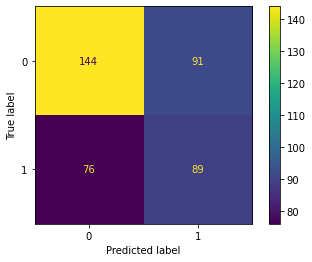

In [14]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [15]:
# True Negative - 144
# False Negative - 91
# True Positive - 89
# False Positive - 76

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       235
           1       0.49      0.54      0.52       165

    accuracy                           0.58       400
   macro avg       0.57      0.58      0.57       400
weighted avg       0.59      0.58      0.58       400



## Accuracy is 58% for 60/40 train and test split

## -------------TEST 2-----------

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=50)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

In [19]:
y_pred=classifier.predict(X_test.values)

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[67 45]
 [39 49]]


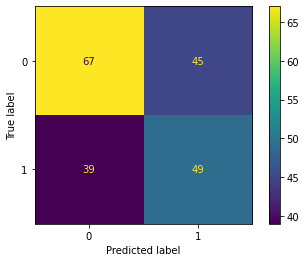

In [21]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [22]:
# True Negative - 67
# False Negative - 45
# True Positive - 49
# False Positive - 39

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61       112
           1       0.52      0.56      0.54        88

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200



## Accuracy is 58% for 80/20 train and test split


## -------------- TEST 3 ---------------

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,random_state=50)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression()

In [26]:
y_pred=classifier.predict(X_test.values)

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[37 23]
 [19 21]]


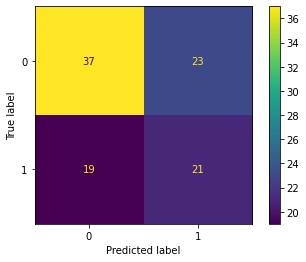

In [28]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [29]:
# True Negative - 37
# False Negative - 23
# True Positive - 21
# False Positive - 19

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        60
           1       0.48      0.53      0.50        40

    accuracy                           0.58       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.59      0.58      0.58       100



## Accuracy is 58% for 90/10 train and test split
